In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\risse\Downloads\E2_BigData\dataset\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Analizamos Missing en la data

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Analisis Exploratorio

A continuacion visualizaremos los outilers de cada columna a traves de Boxplots

In [5]:
import seaborn as sns

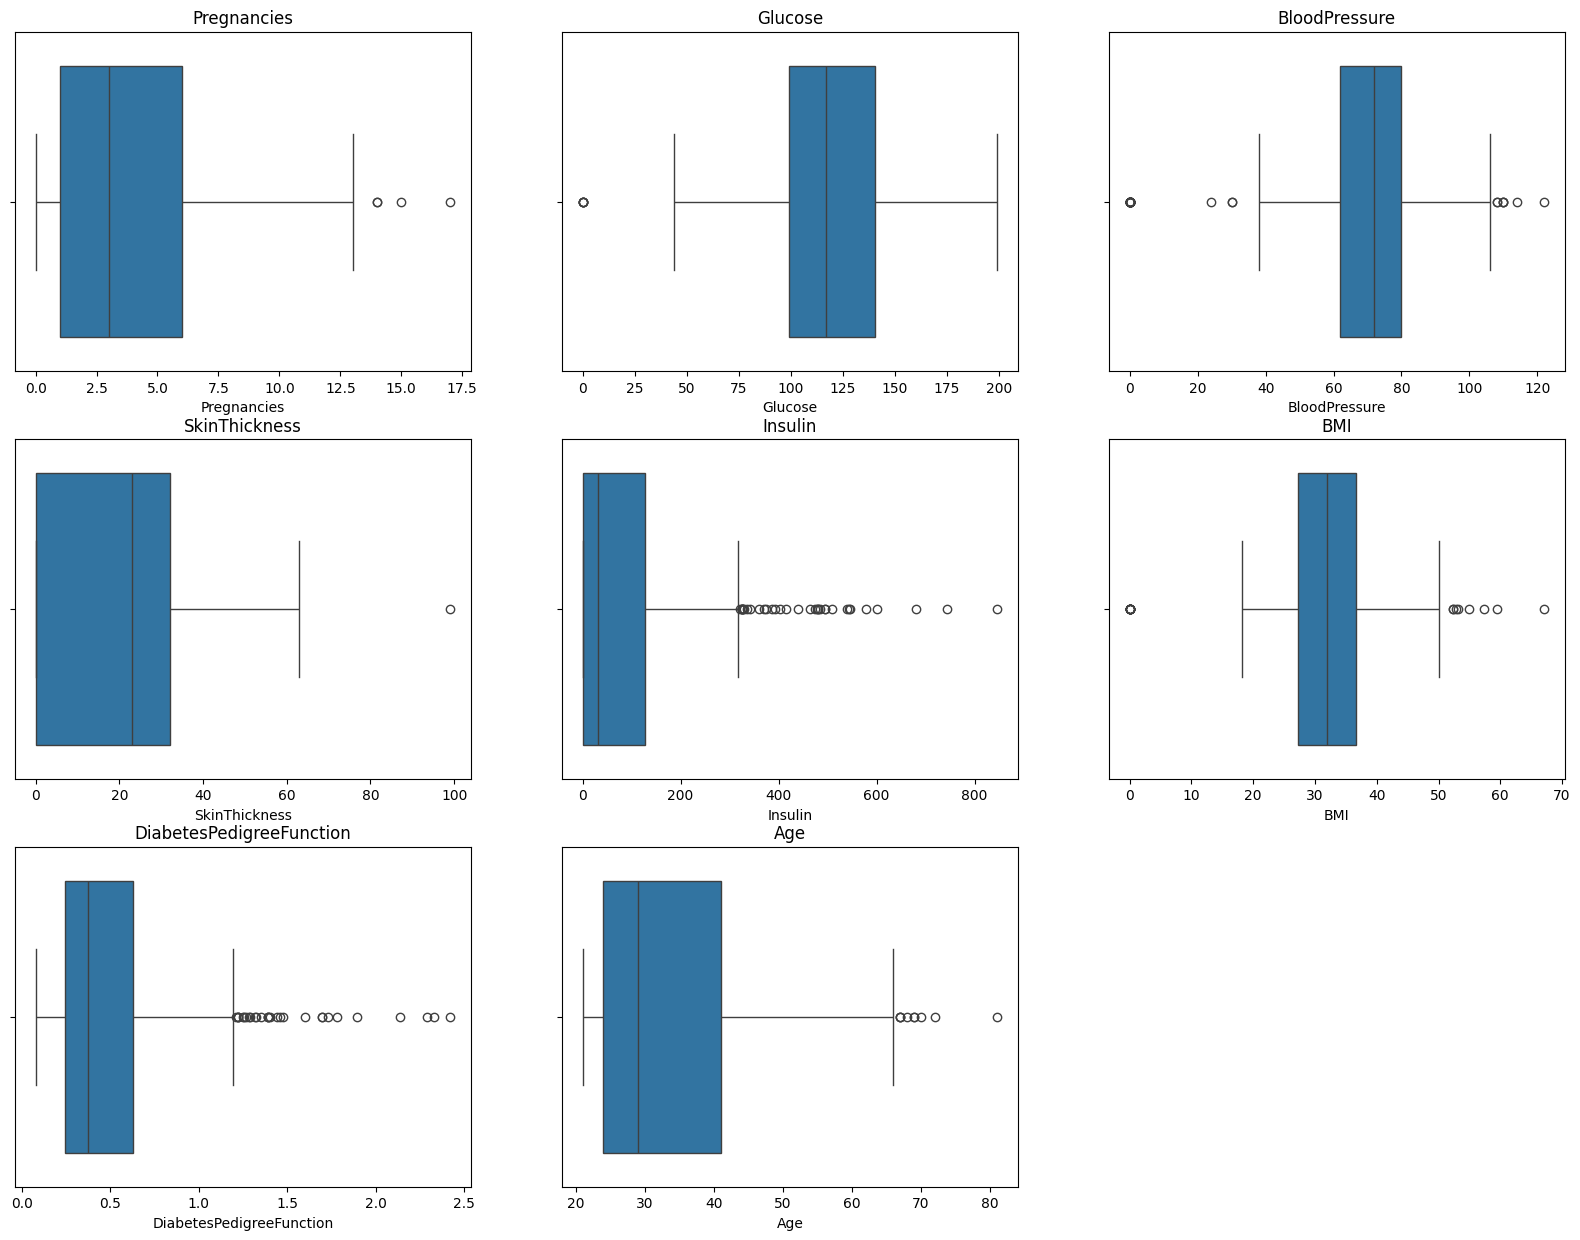

In [8]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.show()

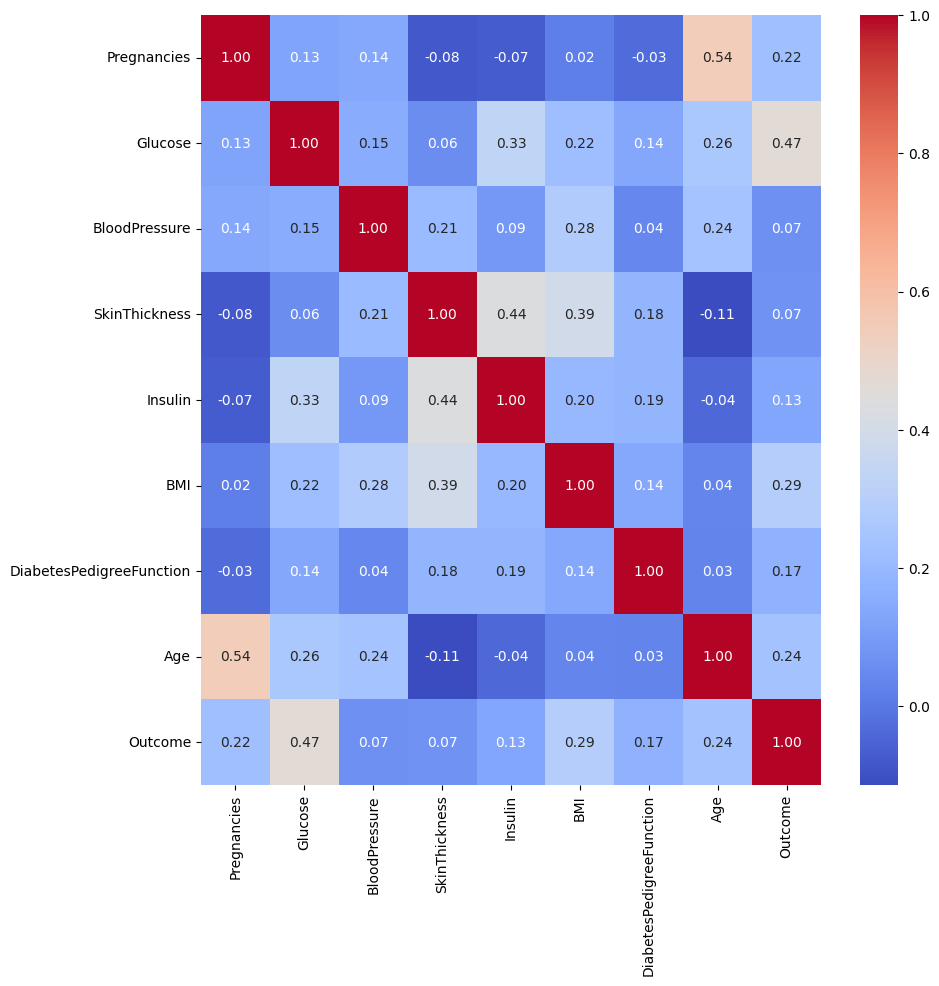

In [9]:
#matriz de correlacion
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Aplicacion de ISOLATION FOREST

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [13]:
# Seleccionar solo las columnas numéricas (excluyendo 'Outcome')
df_diabetes = df.drop('Outcome', axis=1)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_diabetes)

In [14]:
# Inicializar el modelo Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Ajustar el modelo a los datos
outliers = iso_forest.fit_predict(X_scaled)

# Convertir el resultado a formato legible: -1 = outlier, 1 = normal
df['outlier'] = outliers


In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,-1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,-1
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,1,1


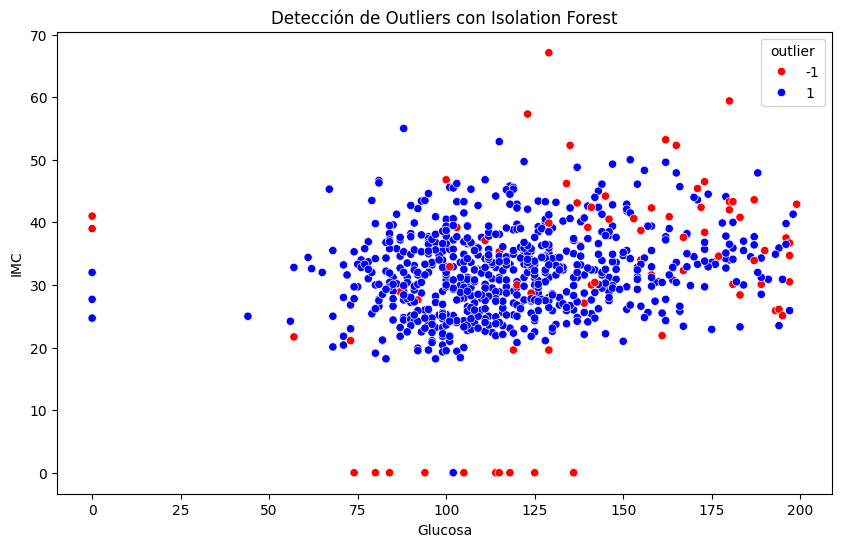

In [24]:
# Visualización de los outliers detectados
plt.figure(figsize=(10, 6))

# Graficar con hue=outlier para identificar los outliers visualmente
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['outlier'], palette={1: 'blue', -1: 'red'})
plt.title('Detección de Outliers con Isolation Forest')
plt.xlabel('Glucosa')
plt.ylabel('IMC')
plt.show()

In [19]:
# Analizar la relación entre outliers y 'Resultado'
outliers_vs_resultado = df.groupby(['outlier', 'Outcome']).size().unstack()

# Visualizar la tabla
outliers_vs_resultado

Outcome,0,1
outlier,,
-1,30,47
1,470,221


In [20]:
print(30+ 47+ 470 + 221)

768


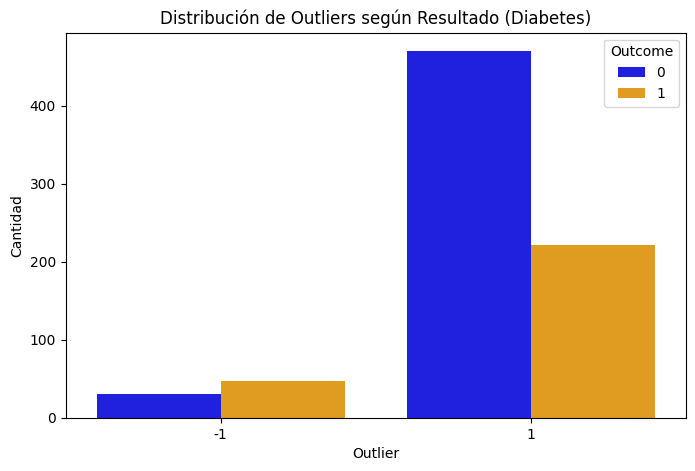

In [21]:
# Visualización de la distribución de outliers según el resultado
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='outlier', hue='Outcome', palette={0: 'blue', 1: 'orange'})
plt.title('Distribución de Outliers según Resultado (Diabetes)')
plt.xlabel('Outlier')
plt.ylabel('Cantidad')
plt.show()
